## Predicting Green Taxi Fares and Total Amounts PART TWO - ML MODELS

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
data = pd.read_csv('cleaned_project_data_20.csv')
data

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_duration,night,peak_hour,congestion,amount_without_tip
0,2020-01-01 00:45:58,2020-01-01 00:56:39,66,65,1.28,20.0,24.36,641.0,1,0,0,20.30
1,2020-01-01 00:41:38,2020-01-01 00:52:49,181,228,2.47,10.5,15.34,671.0,1,0,0,11.80
2,2020-01-01 00:52:46,2020-01-01 01:14:21,129,263,6.30,21.0,25.05,1295.0,1,0,1,25.05
3,2020-01-01 00:19:57,2020-01-01 00:30:56,210,150,2.30,10.0,11.30,659.0,1,0,0,11.30
4,2020-01-01 00:52:33,2020-01-01 01:09:54,35,39,3.00,13.5,14.80,1041.0,1,0,0,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1128350,2020-12-31 23:08:35,2020-12-31 23:13:00,41,74,0.79,5.0,6.30,265.0,1,0,0,6.30
1128351,2020-12-31 23:11:04,2020-12-31 23:20:08,41,116,2.31,12.0,12.30,544.0,1,0,0,12.30
1128352,2020-12-31 23:24:33,2020-12-31 23:40:24,116,119,5.73,20.0,20.30,951.0,1,0,0,20.30
1128353,2020-12-31 23:13:59,2020-12-31 23:16:20,42,42,0.31,3.5,4.80,141.0,1,0,0,4.80


In [3]:
data.describe()

,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_duration,night,peak_hour,congestion,amount_without_tip
count,1.128355e+06,1.128355e+06,1.128355e+06,1.128355e+06,1.128355e+06,1.128355e+06,1.128355e+06,1.128355e+06,1.128355e+06,1.128355e+06
mean,1.003484e+02,1.291194e+02,2.957680e+00,1.243624e+01,1.553554e+01,7.914433e+02,2.316549e-01,2.181911e-01,1.866771e-01,1.427242e+01
std,6.676896e+01,7.655447e+01,3.553636e+00,1.053855e+01,1.218036e+01,6.511085e+02,4.218899e-01,4.130180e-01,3.896522e-01,1.135343e+01
min,1.000000e+00,1.000000e+00,1.000000e-02,2.500000e+00,2.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,4.900000e+01,6.500000e+01,1.060000e+00,6.500000e+00,8.300000e+00,3.790000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.800000e+00
50%,7.500000e+01,1.290000e+02,1.790000e+00,9.000000e+00,1.176000e+01,6.160000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.080000e+01
75%,1.300000e+02,1.930000e+02,3.340000e+00,1.450000e+01,1.806000e+01,9.820000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.630000e+01
max,2.650000e+02,2.650000e+02,3.979000e+01,1.460000e+02,1.491600e+02,7.198000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.480500e+02


## Visualisation Functions

In [3]:
# Coefficient Plot
def plot_coefficients(model, feature_names):
    coeffs = model.coef_
    indices = np.argsort(abs(coeffs))
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.barh(range(len(indices)), coeffs[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Coefficient Value')
    plt.show()

def plot_coefficients_multi(model, feature_names):
    coeffs = model.coef_
    n_features = coeffs.shape[1]
    n_outputs = coeffs.shape[0]
    
    fig, axs = plt.subplots(n_outputs, 1, figsize=(10, n_outputs * 6), squeeze=False)
    
    for output_idx in range(n_outputs):
        indices = np.argsort(abs(coeffs[output_idx]))
        axs[output_idx, 0].set_title(f"Feature Importance for Output {output_idx}")
        axs[output_idx, 0].barh(range(n_features), coeffs[output_idx][indices], color='b', align='center')
        axs[output_idx, 0].set_yticks(range(n_features))
        axs[output_idx, 0].set_yticklabels([feature_names[i] for i in indices])
        axs[output_idx, 0].set_xlabel('Coefficient Value')
    
    plt.tight_layout()
    plt.show()


def plot_residuals(y_true: pd.Series, y_pred: np.ndarray, sample_size: int = 10000, lowess: bool = False):
    assert isinstance(y_true, pd.Series), "y_true must be a pandas Series"
    if len(y_true) > sample_size:
        indices = np.random.choice(len(y_true), size=sample_size, replace=False)
        y_true_sampled = y_true.iloc[indices]
        y_pred_sampled = y_pred[indices]
    else:
        y_true_sampled = y_true
        y_pred_sampled = y_pred

    residuals = y_true_sampled - y_pred_sampled
    sns.residplot(x=y_pred_sampled, y=residuals, lowess=lowess, scatter_kws={'s': 20}, line_kws={'color': 'red'})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()


# Linear Regression

In [4]:
data.columns.tolist()

['lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_distance',
 'fare_amount',
 'total_amount',
 'trip_duration',
 'night',
 'peak_hour',
 'congestion',
 'amount_without_tip']

In [3]:
X = data[[
             'trip_distance',
             'trip_duration',
             'night',
             'peak_hour',
             'congestion',
]]
# y = data['fare_amount']
# y = data['total_amount']
y = data['amount_without_tip']

In [4]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [5]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Create Model

In [8]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=10)

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores
# 100 array([-6.31218951, -6.01569168, -6.62812925, -5.87943677, -6.19281328])
# 10  array([-6.31209849, -6.01579488, -6.62817861, -5.87945748, -6.19271805])
# 5   array([-6.31209356, -6.01580074, -6.62818148, -5.87945875, -6.19271288])
# 1   array([-6.31208962, -6.01580544, -6.62818379, -5.87945979, -6.19270875])

array([-6.31209849, -6.01579488, -6.62817861, -5.87945748, -6.19271805])

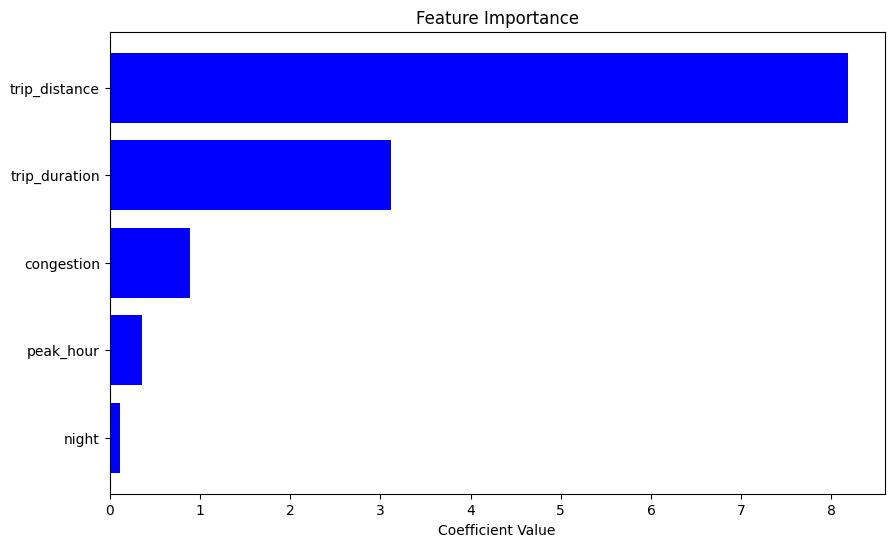

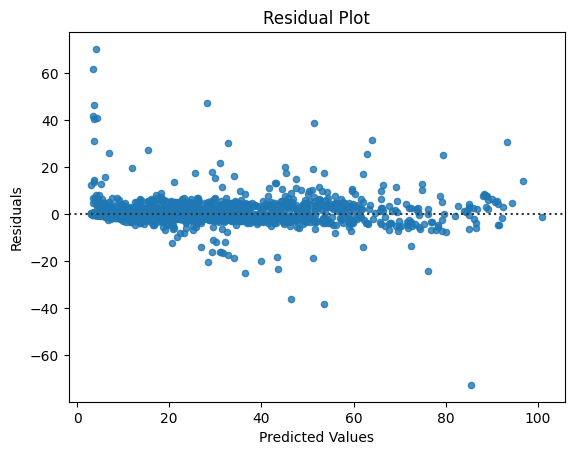

In [10]:
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
plot_coefficients(model, feature_names=['trip_distance', 'trip_duration',  'night', 'peak_hour', 'congestion'])
plot_residuals(y_val, y_val_pred)

### Evaluation

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.8328238926612666
2.4518231305803773


14.294583088990695

In [12]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

### Another Evaluation

In [13]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.8328412924900775
2.451823851093231


14.294583088990695

### Final Evaluation

In [14]:
y_final_test_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.8328191347890102
2.588784155572637


14.26793416765138

# Linear Regression - Multioutput

In [15]:
data.columns.tolist()

['lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_distance',
 'fare_amount',
 'total_amount',
 'trip_duration',
 'night',
 'peak_hour',
 'congestion',
 'amount_without_tip']

In [16]:
X = data[[
             'trip_distance',
             'trip_duration',
             'night',
             'peak_hour',
             'congestion',
]]
y = data[['fare_amount', 'total_amount', 'amount_without_tip']]

In [17]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [18]:
# Scale data
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Create Model

In [19]:
model = Ridge(alpha=10)

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-7.31947145, -7.00034078, -7.60436999, -6.85626521, -7.14397483])

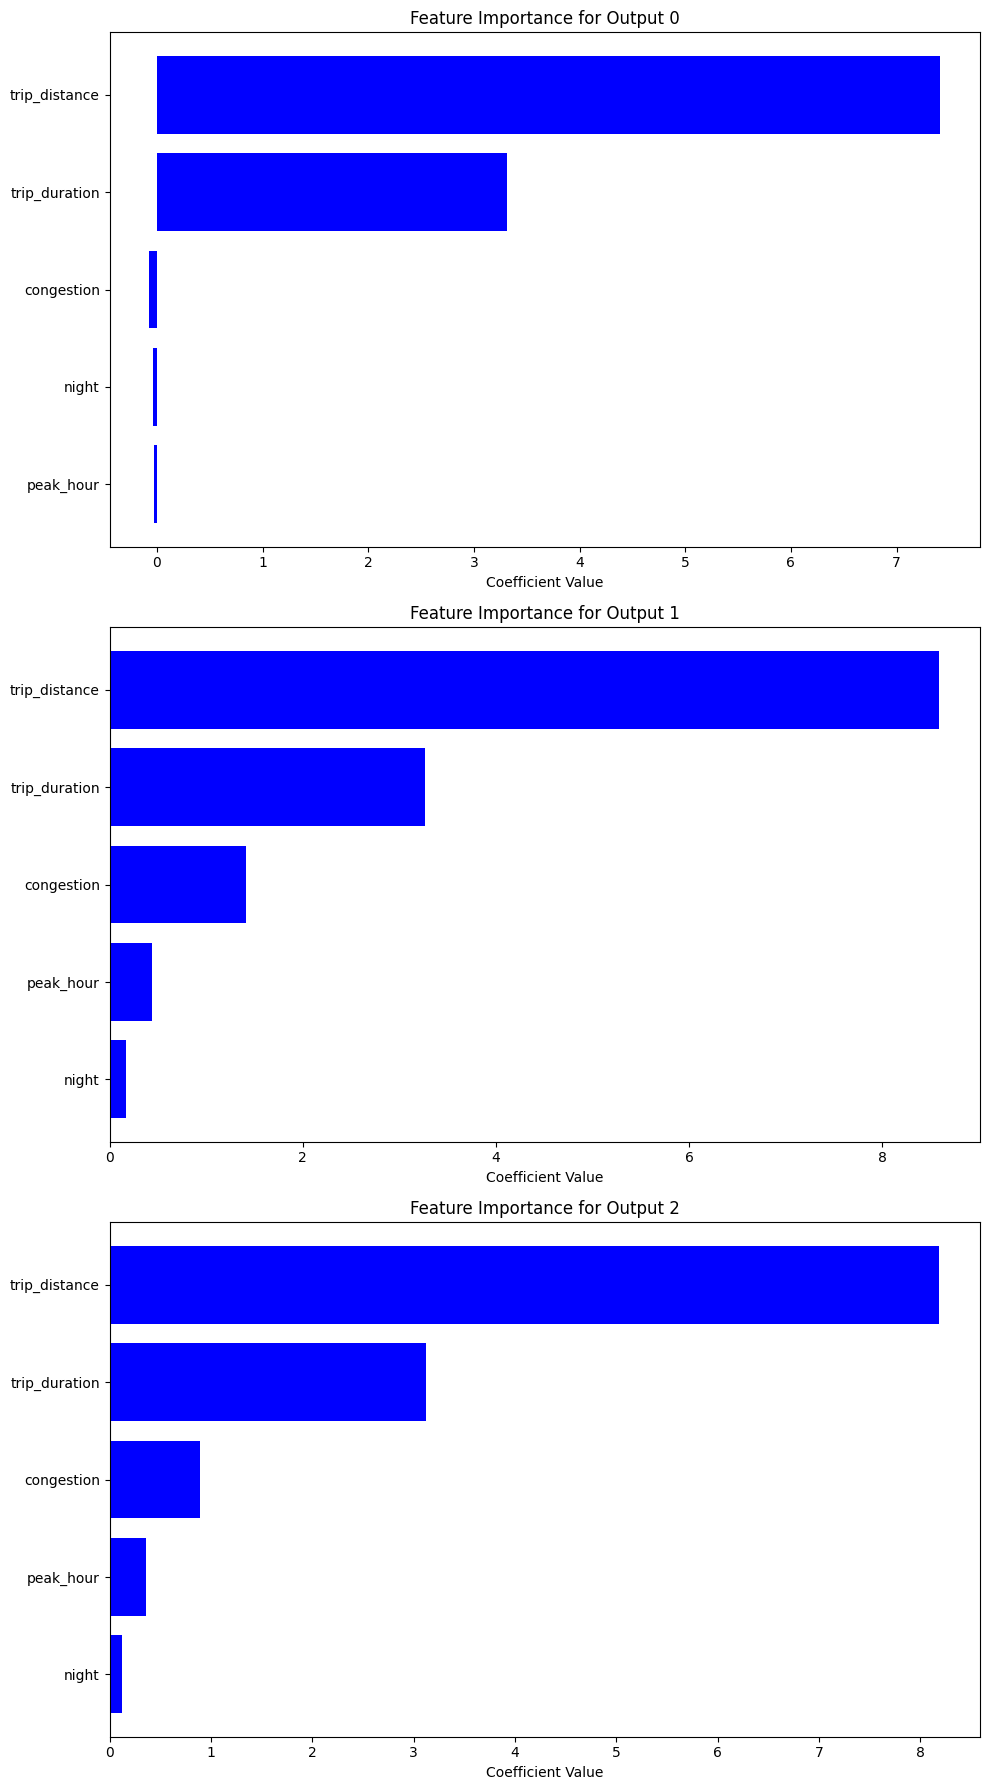

In [21]:
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
plot_coefficients_multi(model, feature_names=['trip_distance', 'trip_duration',  'night', 'peak_hour', 'congestion'])

### Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_per_output = mean_absolute_error(y_val, y_val_pred, multioutput='raw_values')
rmse_per_output = np.sqrt(mean_squared_error(y_val, y_val_pred, multioutput='raw_values'))

for i, output_name in enumerate(y_val.columns):
    print(f"Output: {output_name}")
    print(f"  MAE: {mae_per_output[i]}")
    print(f"  RMSE: {rmse_per_output[i]}")
    print(f"  Mean: {y_val[output_name].mean()}")
    print()

Output: fare_amount
  MAE: 0.587653733675747
  RMSE: 2.2022146613360034
  Mean: 12.455627053029334

Output: total_amount
  MAE: 1.6127943114915642
  RMSE: 3.1788863791585213
  Mean: 15.560964069506479

Output: amount_without_tip
  MAE: 0.832823892661263
  RMSE: 2.45182313058038
  Mean: 14.294583088990695



### Adjust Parameters and Re-evaluate

In [23]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

### Another Evaluation

In [24]:
mae_per_output = mean_absolute_error(y_val, y_val_pred, multioutput='raw_values')
rmse_per_output = np.sqrt(mean_squared_error(y_val, y_val_pred, multioutput='raw_values'))

for i, output_name in enumerate(y_val.columns):
    print(f"Output: {output_name}")
    print(f"  MAE: {mae_per_output[i]}")
    print(f"  RMSE: {rmse_per_output[i]}")
    print(f"  Mean: {y_val[output_name].mean()}")
    print()

Output: fare_amount
  MAE: 0.5876620244863399
  RMSE: 2.202214809097217
  Mean: 12.455627053029334

Output: total_amount
  MAE: 1.612793785231622
  RMSE: 3.1788868116124807
  Mean: 15.560964069506479

Output: amount_without_tip
  MAE: 0.8328412924900694
  RMSE: 2.451823851093231
  Mean: 14.294583088990695



### Final Evaluation

In [25]:
y_final_test_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()
mae_per_output = mean_absolute_error(y_test, y_final_test_pred, multioutput='raw_values')
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_final_test_pred, multioutput='raw_values'))

for i, output_name in enumerate(y_val.columns):
    print(f"Output: {output_name}")
    print(f"  MAE: {mae_per_output[i]}")
    print(f"  RMSE: {rmse_per_output[i]}")
    print(f"  Mean: {y_val[output_name].mean()}")
    print()

1.0106779997123303
2.7713911808011638
Output: fare_amount
  MAE: 0.5908347134014638
  RMSE: 2.3567998571533764
  Mean: 12.455627053029334

Output: total_amount
  MAE: 1.608380150946524
  RMSE: 3.2841312793865924
  Mean: 15.560964069506479

Output: amount_without_tip
  MAE: 0.8328191347890027
  RMSE: 2.5887841555726148
  Mean: 14.294583088990695



# K Nearest Neighbors

In [26]:
X = data[[
             'trip_distance',
             'trip_duration',
             'night',
             'peak_hour',
             'congestion',
]]
# y = data['fare_amount'] # Result: 
# y = data['total_amount'] # Result: 
y = data['amount_without_tip'] # Result: 

In [27]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [28]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [29]:
from sklearn.neighbors import KNeighborsRegressor

#help(KNeighborsRegressor)
knn_model = KNeighborsRegressor(n_neighbors=20)
knn_model.fit(X_train, y_train)
y_val_pred = knn_model.predict(X_val)

## Evaluation

In [30]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.7273042165088912
2.390581048156562


14.294583088990695

## Final Evaluation

In [31]:
y_final_test_pred = knn_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.7262236858595627
2.5303442394028246


14.26793416765138

# Support Vector Machines

In [32]:
sample = data.sample(50000, random_state=22)
X = sample[[
             'trip_distance',
             'trip_duration',
             'night',
             'peak_hour',
             'congestion',
]]
# y = sample['fare_amount'] # Result: 
# y = sample['total_amount'] # Result: 
y = sample['amount_without_tip'] # Result: 

In [33]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [34]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [35]:
from sklearn.svm import SVR #, LinearSVR

In [36]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'epsilon':[0.01, 0.1, 0.5]}
grid_search = GridSearchCV(SVR(), parameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) # {'C': 10, 'epsilon': 0.5, 'gamma': 'auto'}

{'C': 10, 'epsilon': 0.5, 'gamma': 'scale'}


In [37]:
svr_model = SVR(C=10, epsilon=0.5, gamma='auto', verbose=3)
svr_model.fit(X_train, y_train)
y_val_pred = svr_model.predict(X_val)

[LibSVM]

## Evaluation

In [38]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.6428775181192948
2.380562987723153


14.253363184079603

## Final Evaluation

In [39]:
y_final_test_pred = svr_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.606896436279941
2.2946931701197957


14.487587878787878

# Decision Tree

In [40]:
X = data[[
             'trip_distance',
             'trip_duration',
             'night',
             'peak_hour',
             'congestion',
]]
# y = data['fare_amount'] # Result: 
# y = data['total_amount'] # Result: 
y = data['amount_without_tip'] # Result: 

In [41]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [42]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_val_pred = tree_model.predict(X_val)

## Evaluation

In [44]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.9488893902857648
3.291248173763645


14.294583088990695

## Final Evaluation

In [45]:
y_final_test_pred = tree_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.9496558035470211
3.4311695149559664


14.26793416765138

# Random Forests

In [46]:
X = data[[
             'trip_distance',
             'trip_duration',
             'night',
             'peak_hour',
             'congestion',
]]
# y = data['fare_amount'] # Result: 
# y = data['total_amount'] # Result: 
y = data['amount_without_tip'] # Result: 

# sample = data.sample(50000)
# X = sample[[
#              'trip_distance',
#              'trip_duration',
#              'night',
#              'peak_hour',
#              'congestion',
# ]]
# # y = sample['fare_amount'] # Result: 
# # y = sample['total_amount'] # Result: 
# y = sample['amount_without_tip'] # Result: 

In [47]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [48]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [49]:
from sklearn.ensemble import RandomForestRegressor

rtree_model = RandomForestRegressor(n_estimators=100)
rtree_model.fit(X_train, y_train)
y_val_pred = rtree_model.predict(X_val)

## Evaluation

In [50]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.8035162739422201
2.5987882667760624


14.294583088990695

## Final Evaluation

In [51]:
y_final_test_pred = rtree_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.7996325033095877
2.709239315772437


14.26793416765138

# Random Forests Data Expansion Pack 1 - Columns added

In [52]:
# X = data[[
#             'PULocationID', # Column added
#             'DOLocationID', # Column added       
#             'trip_distance',
#             'trip_duration',
#             'night',
#             'peak_hour',
#             'congestion',
# ]]
# # y = data['fare_amount'] # Result: 
# # y = data['total_amount'] # Result: 
# y = data['amount_without_tip'] # Result: 

sample = data.sample(50000, random_state=22)
X = sample[[
            'PULocationID', # Column added
            'DOLocationID', # Column added       
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion',
]]
# y = sample['fare_amount'] # Result: 
# y = sample['total_amount'] # Result: 
y = sample['amount_without_tip'] # Result: 

In [53]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [54]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [55]:
from sklearn.ensemble import RandomForestRegressor

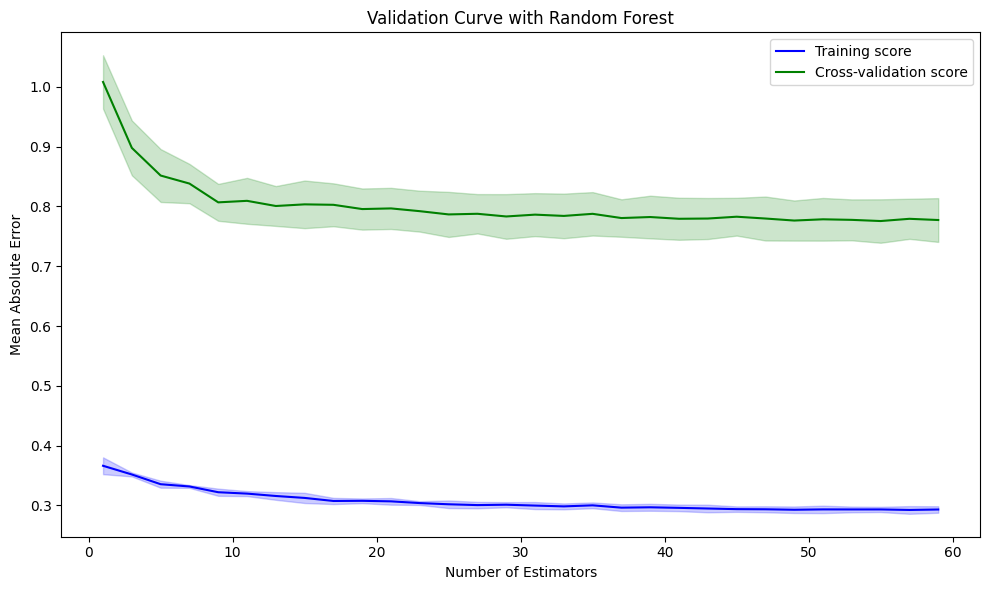

In [56]:
from sklearn.model_selection import validation_curve

# Define a range of n_estimators values over which you want to evaluate the random forest
param_range = np.arange(1, 60, 2)

# Calculate training and test scores using validation_curve
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), 
    X_train, 
    y_train, 
    param_name="n_estimators", 
    param_range=param_range, 
    cv=5, 
    scoring="neg_mean_absolute_error", 
    n_jobs=-1
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)

# Calculate mean and standard deviation for test set (cross-validation) scores
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Plot the validation curve
plt.subplots(1, 1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Absolute Error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


In [57]:
rtree_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=8, random_state=22)

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [10, 15, 20], 'min_samples_split': [8, 12, 14]}
grid_search = GridSearchCV(rtree_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_) # Best parameters: {'max_depth': 15, 'min_samples_split': 12}
                                                    # Best parameters: {'max_depth': 20, 'min_samples_split': 14}

Best parameters: {'max_depth': 20, 'min_samples_split': 14}


In [59]:
cv_scores = cross_val_score(rtree_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"CV MAE: {-cv_scores.mean()} (± {cv_scores.std()})") # CV MAE: 0.7398048666270434 (± 0.02727783118422799)

CV MAE: 0.7398048666270434 (± 0.02727783118422799)


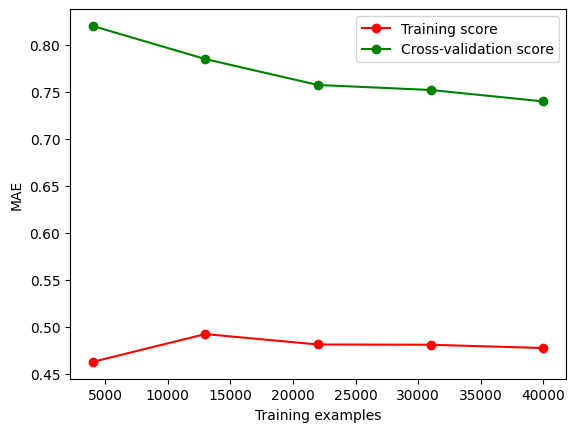

In [60]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rtree_model, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("MAE")
plt.legend(loc="best")
plt.show()


In [61]:
rtree_model.fit(X_train, y_train)
y_val_pred = rtree_model.predict(X_val)

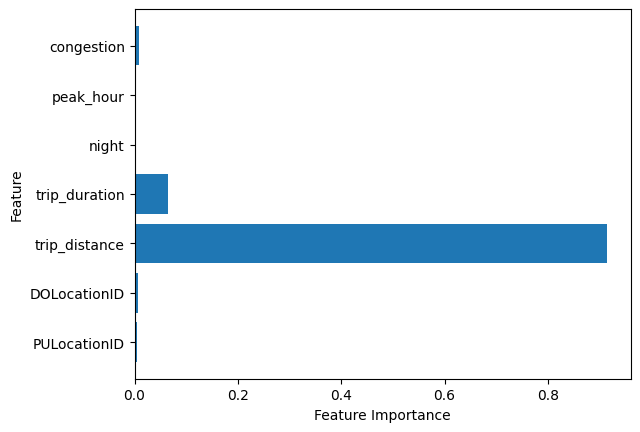

In [62]:
# Check feature importamces
feature_importances = rtree_model.feature_importances_
features = ['PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration', 'night', 'peak_hour', 'congestion']
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

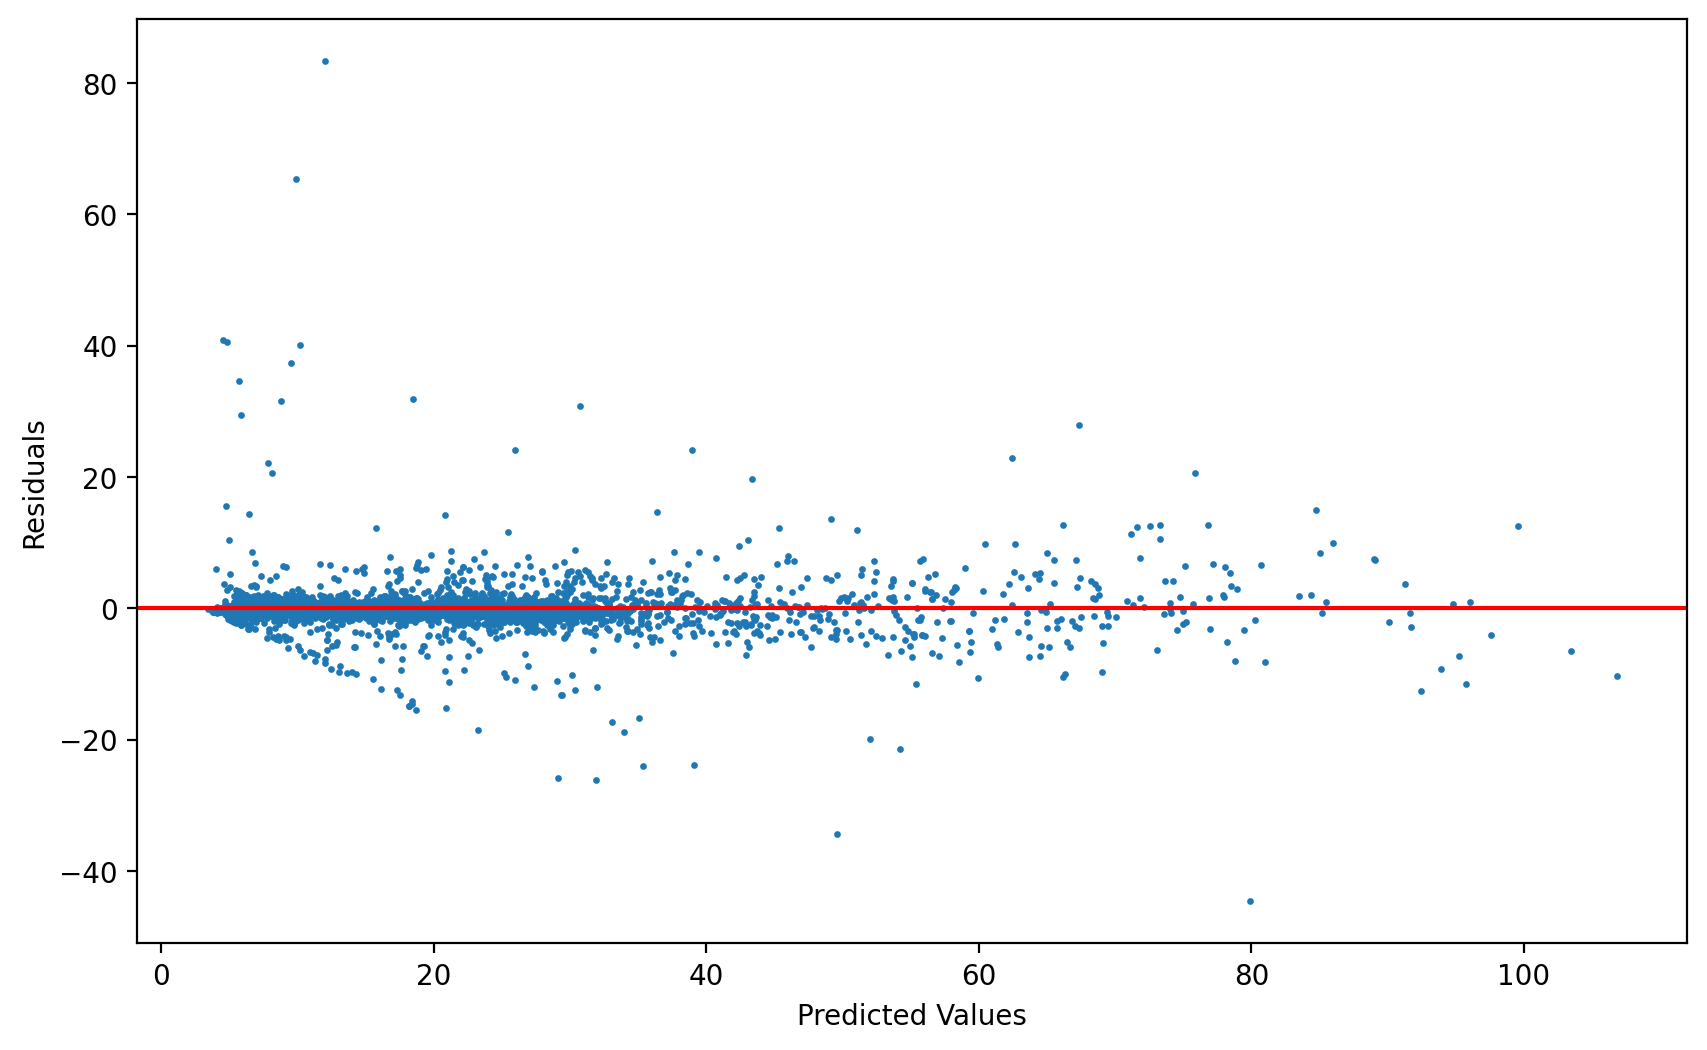

In [63]:
# Plot residuals
y_val_pred = rtree_model.predict(X_val)
residuals = y_val - y_val_pred

plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(y_val_pred, residuals, s=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

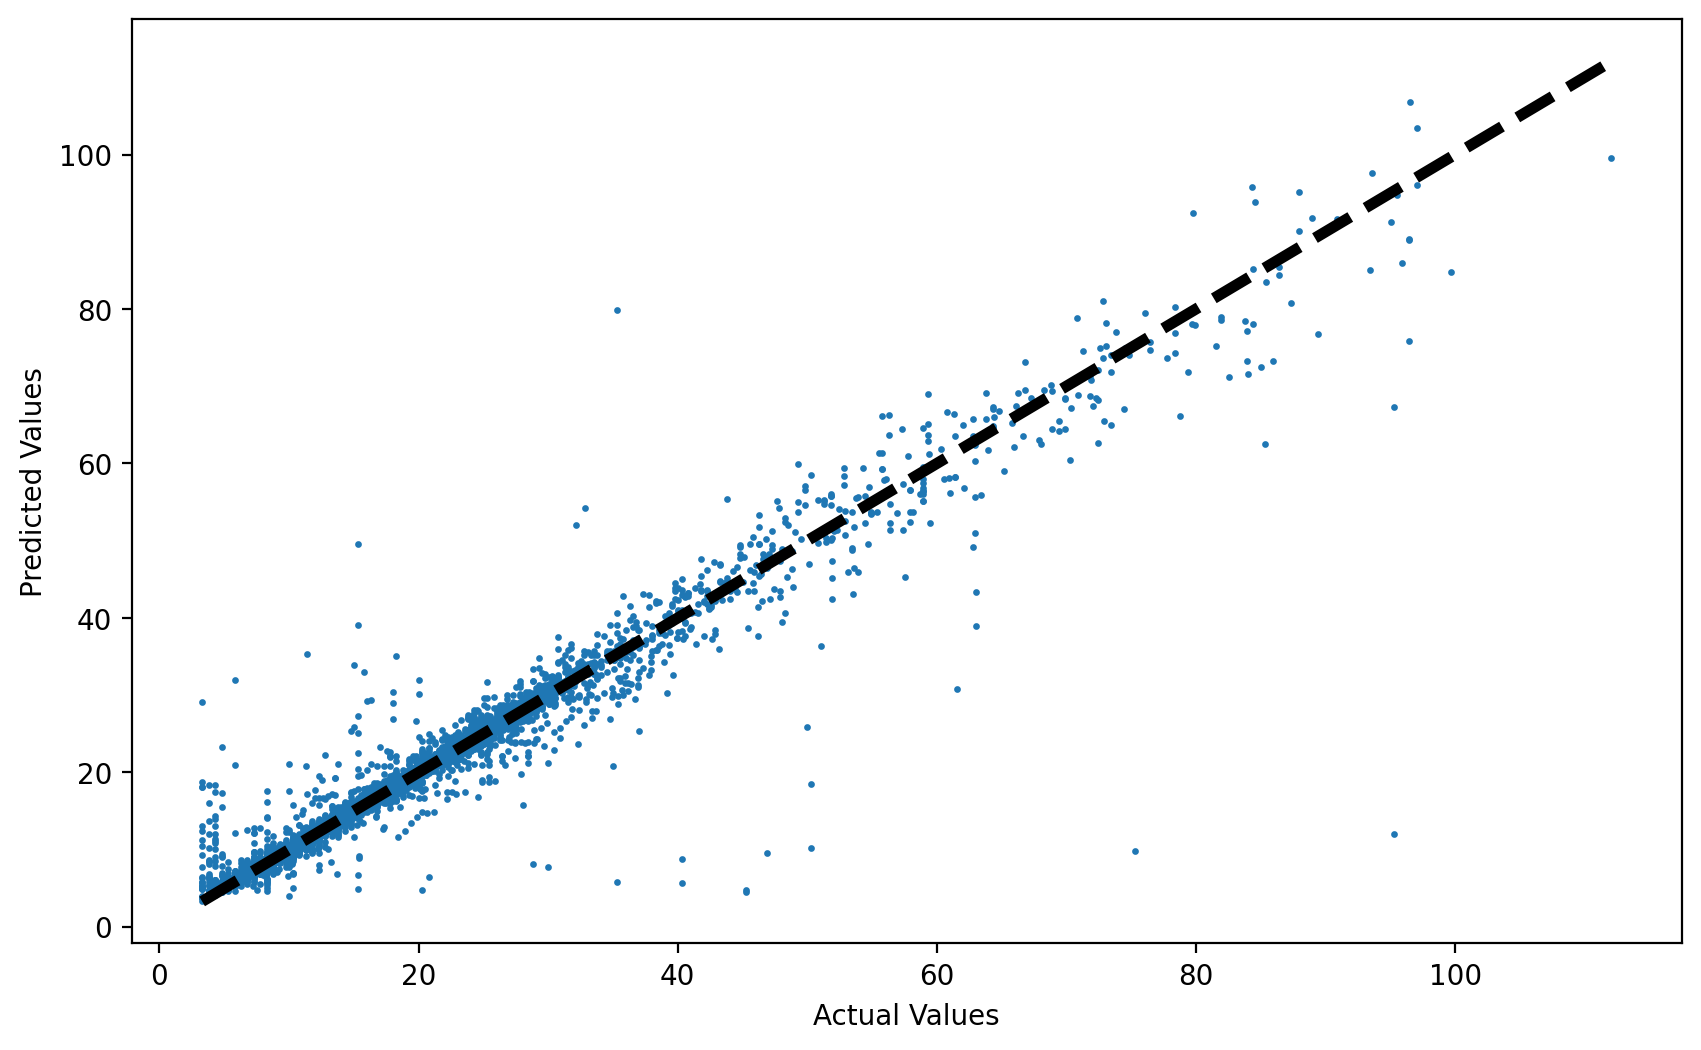

In [64]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(y_val, y_val_pred, s=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.show()

## Evaluation

In [65]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.7436754497168099
2.3949338214044174


14.253363184079603

## Final Evaluation

In [66]:
y_final_test_pred = rtree_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.7267793938643865
2.3548588186330255


14.487587878787878

# Random Forests Data Expansion Pack 2 - Hot Encoder

In [69]:
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical features (PULocationID and DOLocationID) with category names
encoder = OneHotEncoder(categories='auto', drop='first', sparse_output=False)

# Fit-transform the encoder and get feature names with category names
col_encoded = encoder.fit_transform(data[['PULocationID', 'DOLocationID']])
category_names = encoder.get_feature_names_out(['PULocationID', 'DOLocationID'])

# Dropping original columns and not useful columns
data_encoded = data.drop(columns=['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime'])

# Concatenating encoded features with other features
data_encoded = pd.concat([data_encoded, pd.DataFrame(col_encoded, columns=category_names)], axis=1)

# Sampling for model initial preparations
sample = data_encoded.sample(150000, random_state=22)
X = sample.drop(columns=['fare_amount', 'total_amount', 'amount_without_tip'])
y = sample['amount_without_tip']

# X = data_encoded.drop(columns=['fare_amount', 'total_amount', 'amount_without_tip'])
# y = data_encoded['amount_without_tip']

print(X.shape)
print(y.shape)

(150000, 516)
(150000,)


In [70]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [71]:
# Scale data
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
# from sklearn.model_selection import validation_curve

# # Define a range of n_estimators values over which you want to evaluate the random forest
# param_range = np.arange(1, 60, 2)

# # Calculate training and test scores using validation_curve
# train_scores, test_scores = validation_curve(
#     RandomForestRegressor(), 
#     X_train, 
#     y_train, 
#     param_name="n_estimators", 
#     param_range=param_range, 
#     cv=5, 
#     scoring="neg_mean_absolute_error", 
#     n_jobs=-1
# )

# # Calculate mean and standard deviation for training set scores
# train_mean = np.mean(-train_scores, axis=1)
# train_std = np.std(-train_scores, axis=1)

# # Calculate mean and standard deviation for test set (cross-validation) scores
# test_mean = np.mean(-test_scores, axis=1)
# test_std = np.std(-test_scores, axis=1)

# # Plot the validation curve
# plt.subplots(1, 1, figsize=(10, 6))
# plt.plot(param_range, train_mean, label="Training score", color="blue")
# plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

# plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
# plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

# plt.title("Validation Curve with Random Forest")
# plt.xlabel("Number of Estimators")
# plt.ylabel("Mean Absolute Error")
# plt.tight_layout()
# plt.legend(loc="best")
# plt.show()


In [74]:
rtree_model = RandomForestRegressor(n_estimators=1000, max_depth=15, min_samples_split=8, random_state=22)

In [75]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_depth': [10, 15, 20], 'min_samples_split': [8, 12, 14}
# grid_search = GridSearchCV(rtree_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_) # Best parameters: {'max_depth': 15, 'min_samples_split': 12}

In [76]:
# cv_scores = cross_val_score(rtree_model, X, y, cv=5, scoring='neg_mean_absolute_error')
# print(f"CV MAE: {-cv_scores.mean()} (± {cv_scores.std()})")

In [78]:
rtree_model.fit(X_train, y_train)
y_val_pred = rtree_model.predict(X_val)

## Evaluation

In [82]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.6957056365702056
2.405854372576345


14.263891542288562

## Final Evaluation

In [83]:
y_final_test_pred = rtree_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.7092521891709068
2.394022339410025


14.165699663299666

# Support Vector Machines - All rows

In [6]:
X = data[[
             'trip_distance',
             'trip_duration',
             'night',
             'peak_hour',
             'congestion',
]]
# y = sample['fare_amount'] # Result: 
# y = sample['total_amount'] # Result: 
y = data['amount_without_tip'] # Result: 

In [7]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [8]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [9]:
from sklearn.svm import SVR #, LinearSVR

In [ ]:
svr_model = SVR(C=10, epsilon=0.5, gamma='auto', verbose=3)
svr_model.fit(X_train, y_train)
y_val_pred = svr_model.predict(X_val)

[LibSVM]

## Evaluation

In [ ]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

## Final Evaluation

In [ ]:
y_final_test_pred = svr_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

# Support Vector Machines - 7 columns

In [ ]:
X = data[[
            'PULocationID', # Column added
            'DOLocationID', # Column added       
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion',
]]
# y = sample['fare_amount'] # Result: 
# y = sample['total_amount'] # Result: 
y = data['amount_without_tip'] # Result: 

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(C=10, epsilon=0.5, gamma='auto', verbose=3)
svr_model.fit(X_train, y_train)
y_val_pred = svr_model.predict(X_val)

## Evaluation

In [ ]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

## Final Evaluation

In [ ]:
y_final_test_pred = svr_model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()